$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 4** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Support Vector Machines**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Vasileios** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 14/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Name, Personal no., email** <br />

General guidelines:
* All solutions to theoretical problems, can be submitted as a single file named *report.pdf*. They can also be submitted in this ipynb notebook, but equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above and also in your file *report.pdf*.
* All datasets can be downloaded from the course website.
* All tables and other additional information should be included.

# Theoretical problems

## [SVM, 5 points]

Consider a (hard margin) SVM with the following training points from
two classes:
\begin{eqnarray}
+1: &(2,2), (4,4), (4,0) \nonumber \\
-1: &(0,0), (2,0), (0,2) \nonumber
\end{eqnarray}

Plot these six training points, and construct by inspection the
weight vector for the optimal hyperplane. In your solution, specify
the hyperplane in terms of w and b such that $w_1 x_1 + w_2 x_2 + b =
0$. Calculate what the margin is (i.e., $2\gamma$ where $\gamma$ is the
distance from the hyperplane to its closest data point), showing all
of your work. (Hint: It may be useful to recall that the distance of a point $(a_1,a_2)$ from the line $w_1x_1 + w_2x_2 + b = 0$ is $|w_1a_1 + w_2a_2 + b|/\sqrt{w_1^2 + w_2^2}$.)

## [SVM cont'd, 5 points]


Consider the same problem from above.

a. Write the primal formulation of the SVM **for this specific example** i.e. you have to specialise the general formulation for the set of inputs given.

b. Give the optimal primal solution **for this specific**.

c. Write the dual formulation **for this specific**.

d. Give the optimal dual solution, comment on support vectors.

# Practical problems

All data files can be loaded using the following code for example:
```python
import numpy as np
data = np.loadtxt('d1.txt')
X = data[:,:2]
Y = data[:,-1]
```

For this assigment, you may use sklearn.svm.SVC or sklearn.svm.NuSVC. 

## [SVM, 5 points]

Consider the dataset **d1.txt** having two-dimensional points $X$ and corresponding labels $Y$.

a. Train an SVM (with linear kernel) on the above data.

b. Plot the data and the separating hyperplane of the trained classifier. Color the points of one class red and the other blue. Mark points that could not be separated correctly. Also, mark the support vectors.

c. Does the classifier have bias, and if so, what is it?

d. What is the (soft) margin?

## [Kernels, 5 points]

Download the dataset **d2.txt**. Consider the following kernels.

* Linear kernel
* Quadratic kernel 
* Radial Basis Function (RBF) kernel

a. Train an SVM with the linear kernel on all of the data (d2.txt). Plot the data. Color the points of one class red and the other blue. Mark points that could not be separated correctly by the trained model.

b. Plot the decision surfaces for the Quadratic and RBF kernel seperately.

Cross validation error for the linear kernel
0.995
The soft margin is :  0.4991358202947272


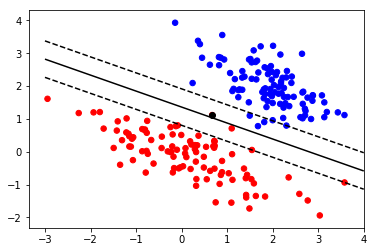

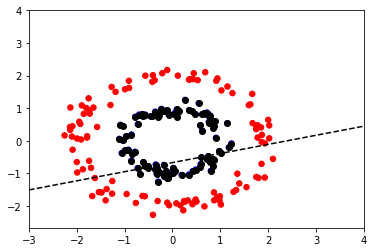

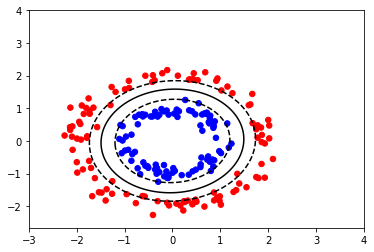

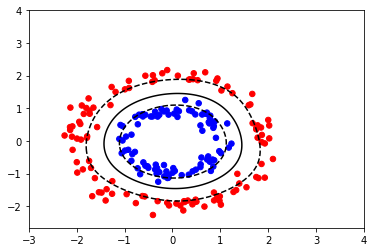

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC


#loading the data 
data = np.loadtxt('d1.txt')
X = data[:,:2]
Y = data[:,-1]

#training the data with a linear kernel
clf = SVC(kernel='linear')
clf.fit(X, Y)

ax = plt.gca()

xx = np.linspace(-3, 4, 1000)
yy = np.linspace(-2, 4, 1000)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

#plotting the hyperplane, support vectors and the scatter plot of the data points 
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=1,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=10,
           linewidth=1, facecolors='none')

plt.scatter(X[:,0],X[:,1],c=Y, s=30, cmap=plt.cm.bwr)

z = clf.predict(X)

# marking the wrongly classified data point in color black
for i in range(len(Y)):
    if z[i] != Y[i]:
        plt.scatter(X[i][0],X[i][1],color="black")
            
# (c)
# Cross Validation Score 
print("Cross validation error for the linear kernel")
print(clf.score(X,Y))

# (d)
# the soft margin
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
print("The soft margin is : ",margin)

plt.show()



#######################################Question 2 ############################

######## linear kernel #################


data = np.loadtxt('d2.txt')
X = data[:,:2]
Y = data[:,-1]

#training the data with a linear kernel
clf = SVC(kernel='linear')
clf.fit(X, Y)

ax = plt.gca()

xx = np.linspace(-3, 4, 1000)
yy = np.linspace(-2, 4, 1000)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

#plotting the hyperplane, support vectors and the scatter plot of the data points 
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=1,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=10,
           linewidth=1, facecolors='none')

plt.scatter(X[:,0],X[:,1],c=Y, s=30, cmap=plt.cm.bwr)

z = clf.predict(X)

# marking the wrongly classified data point in color black
for i in range(len(Y)):
    if z[i] != Y[i]:
        plt.scatter(X[i][0],X[i][1],color="black")

plt.show()      

################# quadratic kernel ##################

data = np.loadtxt('d2.txt')
X = data[:,:2]
Y = data[:,-1]

#training the data with a quadratic kernel
clf = SVC(kernel='poly',degree=2)
clf.fit(X, Y)

ax = plt.gca()

xx = np.linspace(-3, 4, 1000)
yy = np.linspace(-2, 4, 1000)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

#plotting the hyperplane, support vectors and the scatter plot of the data points 
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=1,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=10,
           linewidth=1, facecolors='none')

plt.scatter(X[:,0],X[:,1],c=Y, s=30, cmap=plt.cm.bwr)

z = clf.predict(X)

# marking the wrongly classified data point in color black
for i in range(len(Y)):
    if z[i] != Y[i]:
        plt.scatter(X[i][0],X[i][1],color="black")
plt.show()

############### rbf kernel ##### 

data = np.loadtxt('d2.txt')
X = data[:,:2]
Y = data[:,-1]

#training the data with an rbf kernel
clf = SVC(kernel='rbf')
clf.fit(X, Y)

ax = plt.gca()

xx = np.linspace(-3, 4, 1000)
yy = np.linspace(-2, 4, 1000)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

#plotting the hyperplane, support vectors and the scatter plot of the data points 
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=1,
           linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=10,
           linewidth=1, facecolors='none')

plt.scatter(X[:,0],X[:,1],c=Y, s=30, cmap=plt.cm.bwr)

z = clf.predict(X)

# marking the wrongly classified data point in color black
for i in range(len(Y)):
    if z[i] != Y[i]:
        plt.scatter(X[i][0],X[i][1],color="black")
plt.show()